
<html>
<body>
<h1>Carlisle & Company Coding Skill Assessment</h1>

<p>First, a disclaimer: We recognize that any short-term coding assessment is an imperfect measure of an individual's ability to design, implement, and maintain high quality software. So this is not a pass/fail assessment. However, we have found that activities such as this one do provide information that supplements what we learn from you via other channels (interviews, references, etc.).
</p>

<h2>Rules:</h2> 
<ul>
<li>You have 2 hours for this task, from the time we send it to you, to the time we receive the result via email.</li>
<li>You may contact us by email (bcrounse@carlisle-co.com) within the first 30 minutes of the exercise. We will be 'on call' and will respond as fast as possible. Please note, however, that we may choose not to answer certain questions.</li>
<li>You may write code in any of the following languages: C, C++, C#, Go, Java, Javascript, Python, Scala. You may use any publicly available libraries to perform functions like loading CSV files, data table manipulation, and so forth.</li>
<li>This is 'open book,' you may use the internet to look up information as needed.</li>
<li>This is a solo effort. Do not seek any 'live' help from other people other than ourselves as described.</li>
<li>We restrict tool usage. While you may use the text editor or IDE of your choosing, please do not make use of any other software that is not freely & publicly available. For example, do not use Tableau to visualize the data.</li>
<li>You will submit all of your coding files to us (please respond to the same email address from which you received this exercise). Your code must list all dependencies (packages, runtimes) that are required for us to run your code. </li>
</ul>

<h2>Here is the task:</h2>

<p>
Accompanying these instructions is a file called transactions.csv. This file represents a year's worth of simulated demand for a sample of service parts across a sample of dealers for a single car manufacturer.
</p>
<p>
The transaction data represents day-by-day sales of parts by dealers. There is one record for each Day-Part-Dealer combination for which a sale was made. The length of the dataset is smaller than the (number of days) * (number of dealers) * (number of parts), as not all dealers sell all parts on all days.
</p>
<p>
The data has the following columns:
</p>
<ul>
<li>Day: The calendar day of the sale. Ranges from 1-365.</li>
<li>Part: The name of the part. A 2-letter string, from AA onwards.</li>
<li>Dealer: The name of the dealer. A 1-letter string.</li>
<li>Units: How many units (the quantity) of a part were sold by a dealer on that day.</li>
<li>Value: The number of units sold times the price at which the dealer sold the part.</li>
</ul>

<p>Example: If Dealer A sold a quantity of 5 units of part AA at $3.50 each on day 1, the data file would read:</p>
<code>1, "AA", "A", 5, 17.50</code>

<p>
Analysis of such transaction data can provide insights that can help manufacturers and dealers better understand the aftersales business.
</p>
<p>
For this exercise, we seek to answer one question: Which dealers are over-charging for service parts?
</p>
<p>
To answer this question, you will write and submit code that will compute each dealer's relative pricing levels.
</p>
<p>
The output of this code should be the names of the dealers whose relative price level is at least 10% higher than the mean pricing level of all of the dealers.
</p>

<h2>Some things to consider:</h2>

<ul>
<li>Parts naturally have a wide range of prices. Think of spark plugs vs. brake pads vs. engine blocks.</li>
<li>We are interested in the average price for each part at each dealer over the course of the year. You need not worry about trends in prices over the course of the year.</li>
<li>The mix of parts sold varies by each dealer. So simply summing up the total units sold and the total value by dealer, and then dividing this total value by total units to determine an average price for each dealer, will not produce the correct answer.</li>
<li>Instead, your code should consider relative price level for each part, dealer by dealer, to determine aggregate relative price levels across the dealers.</li>
<li>Note that we have not precisely defined "relative price level" and "mean pricing level." You will define these. Select definitions that seem sensible to you.</li>
<li>If you wish to visualize the data, please do so programatically. Please do not use a commercial package like Tableau. You <em>may</em> submit the code you used for visualizations (and any other exploratory data analysis). We will not evaluate <em>this</em> code for style or aesthetics.</li>
</ul>

<h2>What we are looking for:</h2>

<h3>Solution:</h3>
<ul>
<li>Readable & logical code: We want to be able to understand your approach and thought process. For this exercise, a clear but somewhat incorrect approach is more valuable than correct but inscrutable code.</li>
<li>The correct answer (desirable, but not a deal-killer if not achieved).</li> 
<li>Efficient code: This is less important than correct and readable code. Don't try to optimize for performance until you have those items covered.</li>
</ul>

<h3>Visualization & Data Exploration (optional):</h3>
<p>For this piece, we are looking to understand how you familiarize yourself with a moderately large, unfamiliar dataset.</p>

<h2>Submissions:</h2>
<ul>
<li>You have 2 hours from this task, from the time we send it to you, to the time we receive the result via email.</li>
<li>You will submit your code to us as attachments in this email (please respond to the same email address from which you received this exercise). Your code must list all dependencies (packages, runtimes) that are required for us to run your code.</li>
<li>NOTE: Please add a .'txt' extension to your files to avoid issues with our email filters. So, <code>solution.py</code> should be renamed as <code>solution.py.txt</code>.</li>
<li>Please send a seperate email without any attachments as well to confirm that you have submitted your response.</li>

</ul>
</body>
</html>

In [101]:
import pandas as pd
import numpy as np
%matplotlib notebook

# Data

In [92]:
pandas_df = pd.read_csv('transactions.csv')  # Importing data into pandas

In [93]:
pandas_df.head() # What the data look like

,Day,Part,Dealer,Units,Value
0,3,AA,B,1,25.26
1,4,AA,B,2,50.53
2,5,AA,B,1,25.26
3,6,AA,B,3,75.79
4,7,AA,B,2,50.53


In [95]:
pandas_df.describe() # Statistics

,Day,Units,Value
count,457312.000000,457312.000000,457312.000000
mean,183.045785,3.805507,67.736388
std,105.378586,3.616721,76.593385
min,1.000000,1.000000,0.330000
25%,92.000000,2.000000,19.520000
50%,183.000000,3.000000,41.010000
75%,274.000000,5.000000,87.020000
max,365.000000,79.000000,1137.320000


<IPython.core.display.Javascript object>


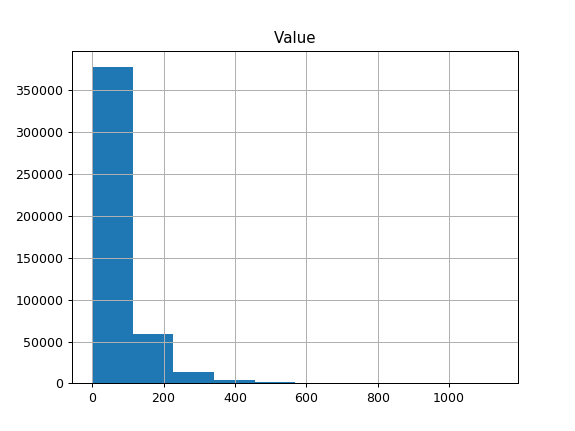

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117164f90>]], dtype=object)

In [100]:
pandas_df.hist(column="Value") # Looking at the distribution of values

# Calculating relative price level

1. Found the average price per unit for each part and each dealer.

In [12]:
pandas_df['Price']=pandas_df['Value']/pandas_df['Units']

In [16]:
pandas_df.head()

,Day,Part,Dealer,Units,Value,Price
0,3,AA,B,1,25.26,25.260000
1,4,AA,B,2,50.53,25.265000
2,5,AA,B,1,25.26,25.260000
3,6,AA,B,3,75.79,25.263333
4,7,AA,B,2,50.53,25.265000


In [58]:
relative_pricing_levels = pandas_df.groupby(['Dealer', 'Part']).mean().drop(['Day', 'Units','Value'], 1).reset_index().rename(columns={'Price': 'DealerPrice'})

In [59]:
relative_pricing_levels.head()

,Dealer,Part,DealerPrice
0,A,AB,5.366058
1,A,AC,46.643474
2,A,AD,25.243296
3,A,BA,16.066154
4,A,BB,48.230000


# Calculating mean price level

1. Found the average price per unit for each part over all dealers.

In [56]:
mean_pricing_level = pandas_df.groupby(['Part']).mean().drop(['Day', 'Units','Value'], 1).reset_index().rename(columns={'Price': 'MeanPrice'})

In [57]:
mean_pricing_level.head()

,Part,MeanPrice
0,AA,26.893514
1,AB,5.425410
2,AC,48.743785
3,AD,25.586284
4,BA,16.318141


#  Which dealers are over-charging for service parts?

The output of this code should be the names of the dealers whose relative price level is at least 10% higher than the mean pricing level of all of the dealers.

1. Merge dealer's relative price and part mean price into the same data frame
2. Compare the dealer price to the mean price and see if the dealer price is at least 10% higher than the mean price
3. If yes then write 1 and if no then write 0
4. Count total number of prices at least 10% higher than the mean price for each dealer
5. See which dealers were the most often at least 10% higher than the mean price for each dealer

In [73]:
merged_df = relative_pricing_levels.merge(mean_pricing_level, how="left", on="Part")

In [74]:
merged_df.head()

,Dealer,Part,DealerPrice,MeanPrice
0,A,AB,5.366058,5.425410
1,A,AC,46.643474,48.743785
2,A,AD,25.243296,25.586284
3,A,BA,16.066154,16.318141
4,A,BB,48.230000,48.720148


In [89]:
merged_df.groupby("Dealer").agg("sum").drop(['DealerPrice', 'MeanPrice'], 1)

,GreaterThan10%
Dealer,
A,2
B,1
C,2
D,6
E,5
F,3
G,96
H,3
I,0


# Conclusions

Looking at the data above, I'd say Dealers G and L are the two dealers who repeatedly sell items for more than 10% higher than the mean price the most often. 